In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

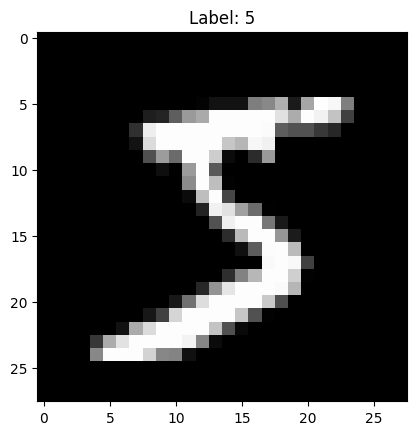

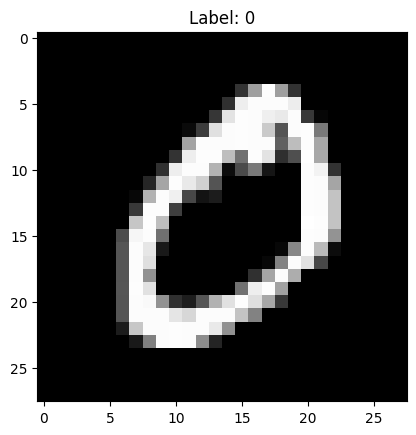

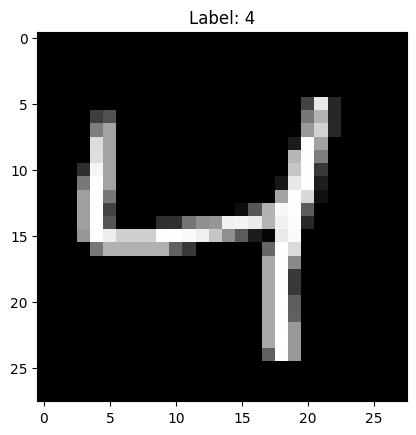

In [7]:
for i in range(3):
    plt.figure()
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [8]:
x_train,x_test=x_train/255.0,x_test/255.0 #standardizing data: 0-1
x_train.shape,y_train.shape#N x 28 x28

((60000, 28, 28), (60000,))

In [9]:
#model building
model=tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)),#since input is 3D
    tf.keras.layers.Dense(128,activation='relu'),#gives 128 output which are input to new layers
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')#since images of 10 numbers are to be predicted

])

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2937 - accuracy: 0.9135 - val_loss: 0.1417 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1422 - accuracy: 0.9573 - val_loss: 0.1004 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1060 - accuracy: 0.9675 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9726 - val_loss: 0.0846 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0741 - accuracy: 0.9765 - val_loss: 0.0766 - val_accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0638 - accuracy: 0.9793 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9810 - val_loss: 0.0755 - val_accuracy:

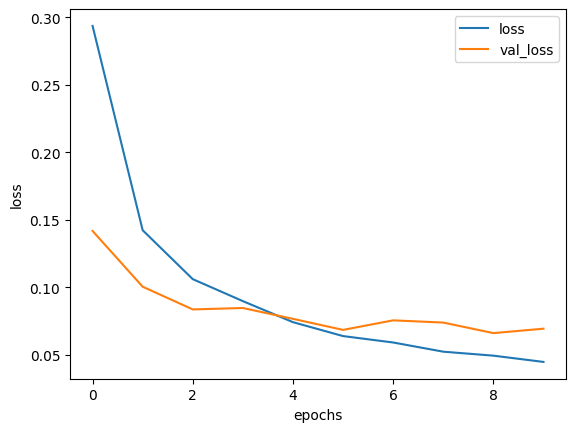

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc=0)

1/1 [==============================] - 0s 171ms/step


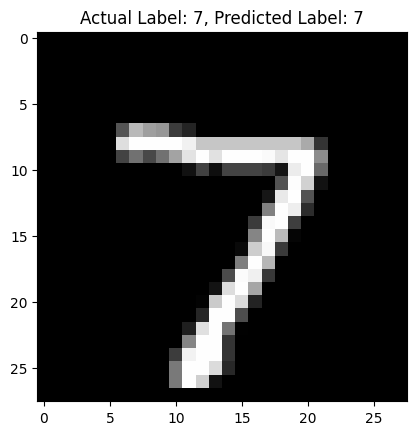

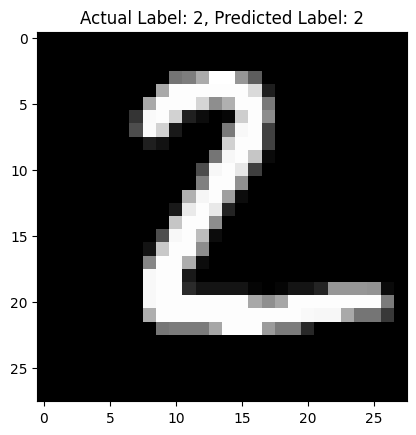

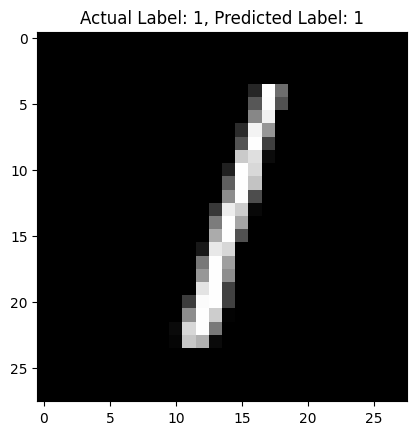

In [13]:
# Make predictions for the first three images
predictions = model.predict(x_test[:3])

# Convert predictions to class labels (index with the maximum probability)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(3):
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual Label: {y_test[i]}, Predicted Label: {predicted_labels[i]}")
    plt.show()


In [ ]:
#google collab link:https://drive.google.com/drive/folders/1STNwHqapmPvDWWC1FWCrPBI5qQ6skU1q